In [4]:
!pip uninstall -y face_recognition
!pip install face_recognition --quiet


Found existing installation: face-recognition 1.3.0
Uninstalling face-recognition-1.3.0:
  Successfully uninstalled face-recognition-1.3.0


In [25]:
# Disable CNN face detector and encoder (to avoid GPU use)
!sed -i 's/^cnn_face_detector = dlib\.cnn_face_detection_model_v1.*$/cnn_face_detector = None  # patched CNN/' /usr/local/lib/python3.*/dist-packages/face_recognition/api.py
!sed -i 's/^face_encoder = dlib\.face_recognition_model_v1.*$/face_encoder = None  # patched encoder/' /usr/local/lib/python3.*/dist-packages/face_recognition/api.py


In [26]:
import cv2                      # OpenCV for video processing
import face_recognition         # Face detection library
import random                   # To choose random frames
from IPython.display import display, Image  # To show images in Colab
import numpy as np              # For numerical operations


In [27]:
video_path = "/content/People_trial.mp4"
cap = cv2.VideoCapture(video_path)


In [28]:
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"🎞 Total frames: {total_frames}")

random_frames = sorted(random.sample(range(total_frames), 5))
print(f"📸 Checking frames: {random_frames}")


🎞 Total frames: 319
📸 Checking frames: [104, 109, 155, 171, 251]


🖼️ Frame 104 - Found 3 face(s)


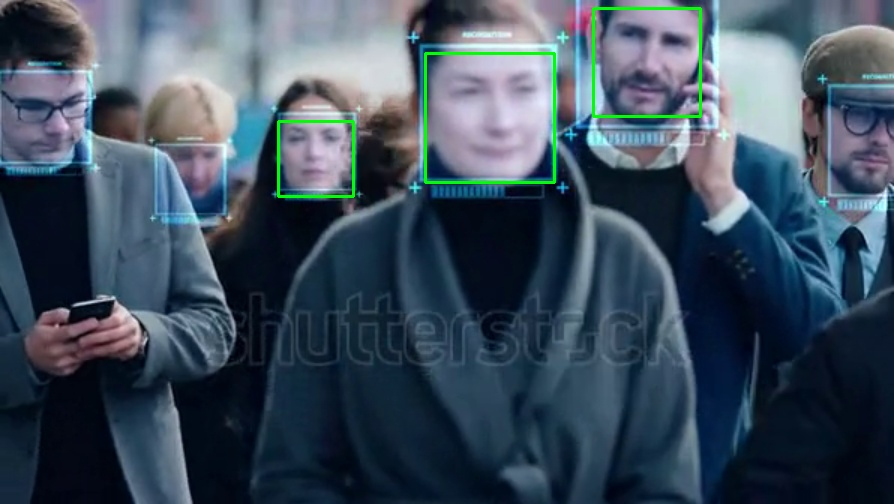

🖼️ Frame 109 - Found 2 face(s)


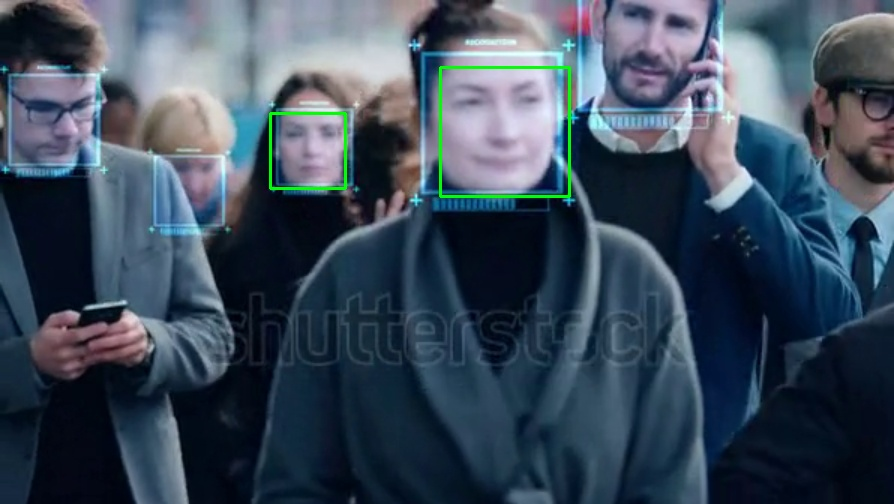

🖼️ Frame 155 - Found 2 face(s)


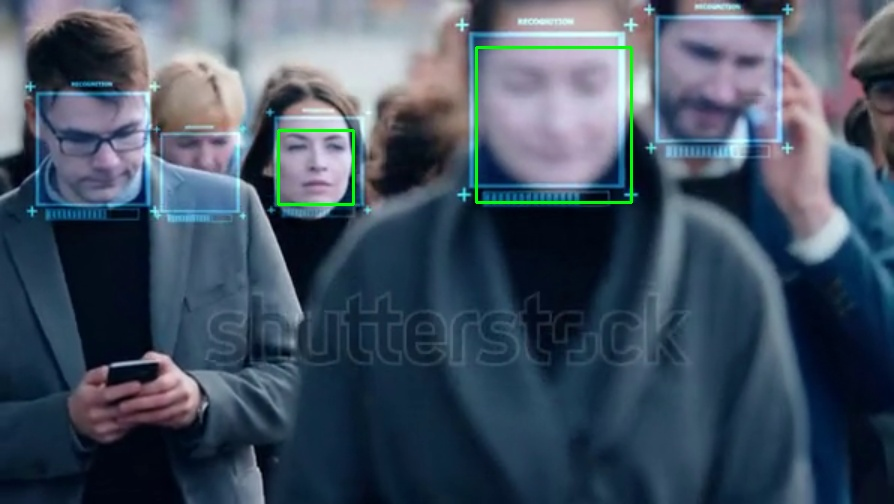

🖼️ Frame 171 - Found 2 face(s)


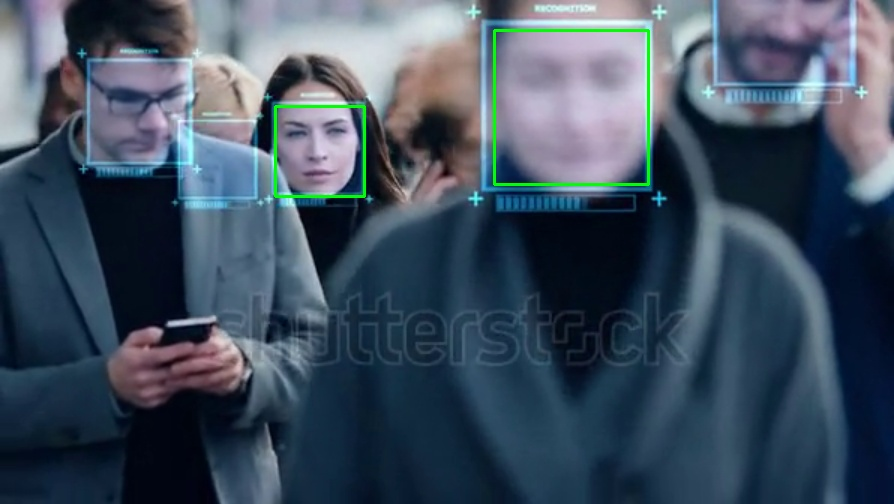

🖼️ Frame 251 - Found 1 face(s)


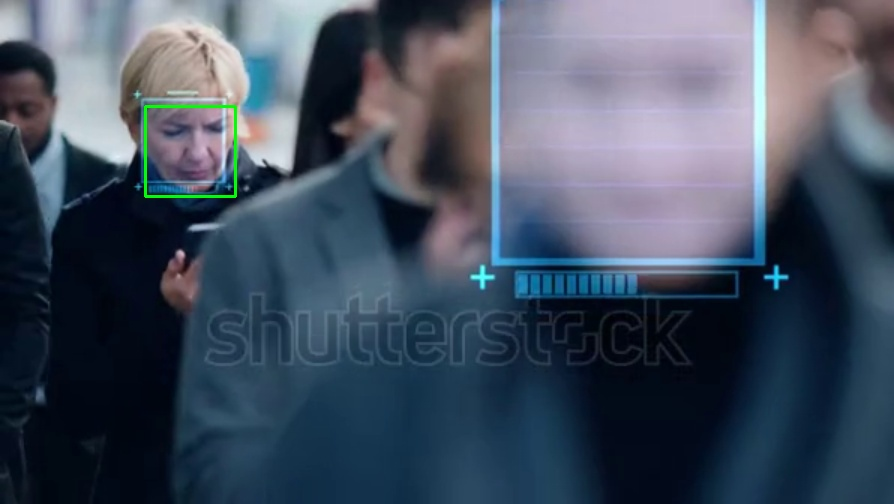

In [29]:
for frame_num in random_frames:
    # Jump to the selected frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()

    if not ret:
        print(f"⚠️ Could not read frame {frame_num}")
        continue

    # ✅ Resize for better visibility (optional)
    small_frame = cv2.resize(frame, (0, 0), fx=1.5, fy=1.5)

    # Convert BGR (OpenCV) to RGB (face_recognition needs RGB)
    rgb_frame = small_frame[:, :, ::-1]

    # 🤖 Detect faces using the HOG model (CPU only)
    face_locations = face_recognition.face_locations(rgb_frame, model="hog")

    print(f"🖼️ Frame {frame_num} - Found {len(face_locations)} face(s)")

    # 🟩 Draw green boxes around faces
    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(small_frame, (left, top), (right, bottom), (0, 255, 0), 2)

    # 🖼️ Convert to image format for display in Colab
    _, jpeg = cv2.imencode('.jpg', small_frame)
    display(Image(data=jpeg.tobytes()))

cap.release()